In [5]:
import numpy as np
import defi.defi_tools as dft
import pandas as pd
import matplotlib.pyplot as plt

#obtenemos datos
data = dft.geckoHistorical('bitcoin')
data['token'] = 'btc' 
#eliminamos columnas que no nos sirven
data = data.drop(['market_caps','total_volumes','token'],axis=1)
#renombramos columna de precio a Close
data = data.rename(columns={'price':'Close'})
data['va'] = data.Close.pct_change()*100
data['va_log'] = np.log(data.Close / data.Close.shift()) # esto es la serie de los retornos logaritmicos de los cierres sobre la serie de los rendimientos logaritmicos anteriores
data

,Close,va,va_log
date,,,
2013-04-28 00:00:00,135.300000,NaN,NaN
2013-04-29 00:00:00,141.960000,4.922395,0.048051
2013-04-30 00:00:00,135.300000,-4.691462,-0.048051
2013-05-01 00:00:00,117.000000,-13.525499,-0.145321
2013-05-02 00:00:00,103.430000,-11.598291,-0.123279
...,...,...,...
2022-06-18 00:00:00,20473.052881,0.315368,0.003149
2022-06-19 00:00:00,19047.417828,-6.963471,-0.072178
2022-06-20 00:00:00,20516.411980,7.712301,0.074294


In [6]:
#definimos las variables de las medias moviles
fast = 10
slow = 40
data['sma_fast'] = data.Close.ewm(span=fast).mean() #ewm es exponential weighted average
data['sma_slow'] = data.Close.ewm(span=slow).mean()
data

,Close,va,va_log,sma_fast,sma_slow
date,,,,,
2013-04-28 00:00:00,135.300000,NaN,NaN,135.300000,135.300000
2013-04-29 00:00:00,141.960000,4.922395,0.048051,138.963000,138.713250
2013-04-30 00:00:00,135.300000,-4.691462,-0.048051,137.490498,137.518150
2013-05-01 00:00:00,117.000000,-13.525499,-0.145321,130.739792,131.997650
2013-05-02 00:00:00,103.430000,-11.598291,-0.123279,122.899894,125.698856
...,...,...,...,...,...
2022-06-18 00:00:00,20473.052881,0.315368,0.003149,24281.042508,29292.377859
2022-06-19 00:00:00,19047.417828,-6.963471,-0.072178,23329.474384,28792.623711
2022-06-20 00:00:00,20516.411980,7.712301,0.074294,22818.008493,28388.906066


In [7]:
#ahora calculamos el cruce
data['cruce'] = (data.sma_fast > data.sma_slow -1).shift() #para que nos de buen indicador de compra, tiene que ser del dia anterior 
data

,Close,va,va_log,sma_fast,sma_slow,cruce
date,,,,,,
2013-04-28 00:00:00,135.300000,NaN,NaN,135.300000,135.300000,NaN
2013-04-29 00:00:00,141.960000,4.922395,0.048051,138.963000,138.713250,True
2013-04-30 00:00:00,135.300000,-4.691462,-0.048051,137.490498,137.518150,True
2013-05-01 00:00:00,117.000000,-13.525499,-0.145321,130.739792,131.997650,True
2013-05-02 00:00:00,103.430000,-11.598291,-0.123279,122.899894,125.698856,False
...,...,...,...,...,...,...
2022-06-18 00:00:00,20473.052881,0.315368,0.003149,24281.042508,29292.377859,False
2022-06-19 00:00:00,19047.417828,-6.963471,-0.072178,23329.474384,28792.623711,False
2022-06-20 00:00:00,20516.411980,7.712301,0.074294,22818.008493,28388.906066,False


In [8]:
# ahora calculamos si estamos comprados o afuera en funcion a la columna cruce
data['estado'] = np.where(data.cruce>0,'Comprado','Afuera') # una alternativa a esto es hacerlo asi:
#data['estado'] = np.where(data.cruce==True,'Comprado','Afuera')
data

,Close,va,va_log,sma_fast,sma_slow,cruce,estado
date,,,,,,,
2013-04-28 00:00:00,135.300000,NaN,NaN,135.300000,135.300000,NaN,Afuera
2013-04-29 00:00:00,141.960000,4.922395,0.048051,138.963000,138.713250,True,Comprado
2013-04-30 00:00:00,135.300000,-4.691462,-0.048051,137.490498,137.518150,True,Comprado
2013-05-01 00:00:00,117.000000,-13.525499,-0.145321,130.739792,131.997650,True,Comprado
2013-05-02 00:00:00,103.430000,-11.598291,-0.123279,122.899894,125.698856,False,Afuera
...,...,...,...,...,...,...,...
2022-06-18 00:00:00,20473.052881,0.315368,0.003149,24281.042508,29292.377859,False,Afuera
2022-06-19 00:00:00,19047.417828,-6.963471,-0.072178,23329.474384,28792.623711,False,Afuera
2022-06-20 00:00:00,20516.411980,7.712301,0.074294,22818.008493,28388.906066,False,Afuera


In [9]:
# ahora le indicamos cuando comprar en funcion a la columna estado
data['accion'] = np.where( (data.estado=='Comprado') & (data.estado.shift()=='Afuera'), 'Comprar', 
                          np.where((data.estado=="Afuera") & (data.estado.shift()=='Comprado'),'Vender',
                          'Sin Accion'))
data.dropna()
data.tail(360) # que nos traiga el ultimo año

,Close,va,va_log,sma_fast,sma_slow,cruce,estado,accion
date,,,,,,,,
2021-06-28 00:00:00,34607.293274,8.066829,0.077580,34132.354557,38124.212884,False,Afuera,Sin Accion
2021-06-29 00:00:00,34556.842127,-0.145782,-0.001459,34209.534115,37950.194798,False,Afuera,Sin Accion
2021-06-30 00:00:00,35968.993668,4.086460,0.040052,34529.435852,37853.550841,False,Afuera,Sin Accion
2021-07-01 00:00:00,35171.486305,-2.217208,-0.022422,34646.172298,37722.718424,False,Afuera,Sin Accion
2021-07-02 00:00:00,33677.566236,-4.247532,-0.043404,34470.062105,37525.393927,False,Afuera,Sin Accion
...,...,...,...,...,...,...,...,...
2022-06-18 00:00:00,20473.052881,0.315368,0.003149,24281.042508,29292.377859,False,Afuera,Sin Accion
2022-06-19 00:00:00,19047.417828,-6.963471,-0.072178,23329.474384,28792.623711,False,Afuera,Sin Accion
2022-06-20 00:00:00,20516.411980,7.712301,0.074294,22818.008493,28388.906066,False,Afuera,Sin Accion


In [10]:
data.loc[data.accion!='Sin Accion']

,Close,va,va_log,sma_fast,sma_slow,cruce,estado,accion
date,,,,,,,,
2013-04-29,141.960000,4.922395,0.048051,138.963000,138.713250,True,Comprado,Comprar
2013-05-02,103.430000,-11.598291,-0.123279,122.899894,125.698856,False,Afuera,Vender
2013-05-14,114.500000,-2.287080,-0.023136,114.706674,115.614750,True,Comprado,Comprar
2013-06-09,108.401000,-1.534199,-0.015461,118.736904,121.429390,False,Afuera,Vender
2013-07-30,101.500000,2.966344,0.029232,95.687240,95.308469,True,Comprado,Comprar
...,...,...,...,...,...,...,...,...
2022-02-20,40192.759121,0.297613,0.002972,41722.275868,42065.565564,False,Afuera,Vender
2022-03-05,39200.299736,-7.746588,-0.080631,41054.953020,41199.779595,True,Comprado,Comprar
2022-03-06,39463.146811,0.670523,0.006683,40765.533709,41115.065801,False,Afuera,Vender


In [11]:
data.loc[data.accion=='Vender']

,Close,va,va_log,sma_fast,sma_slow,cruce,estado,accion
date,,,,,,,,
2013-05-02,103.430000,-11.598291,-0.123279,122.899894,125.698856,False,Afuera,Vender
2013-06-09,108.401000,-1.534199,-0.015461,118.736904,121.429390,False,Afuera,Vender
2013-12-23,645.750000,-0.695096,-0.006975,699.984478,713.525462,False,Afuera,Vender
2014-02-08,701.610000,-2.732490,-0.027705,786.626419,806.467901,False,Afuera,Vender
2014-07-28,585.278800,-0.863852,-0.008676,602.822291,606.961169,False,Afuera,Vender
2014-11-22,351.550000,0.618714,0.006168,366.525193,370.055012,False,Afuera,Vender
2014-11-27,368.448000,0.733256,0.007306,368.961413,370.198810,False,Afuera,Vender
2014-12-10,346.979872,-1.125054,-0.011314,364.182005,369.554781,False,Afuera,Vender
2015-03-26,247.559500,0.523000,0.005216,258.968027,262.291661,False,Afuera,Vender


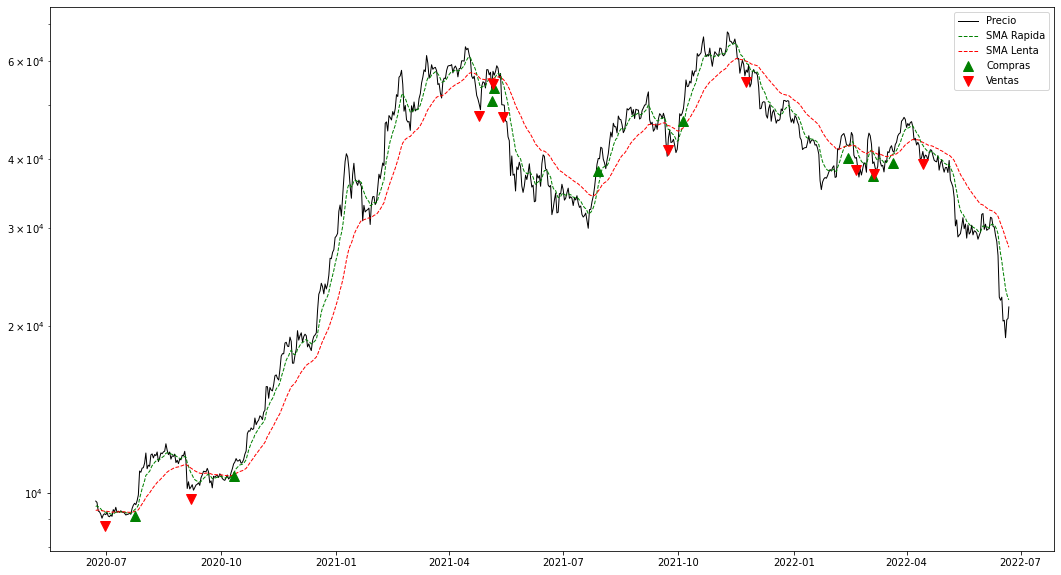

In [12]:
import matplotlib.pyplot as plt

#traigo los ultimos 2 años
df = data.iloc[-730:] #ultimas 730 filas, todas las columnas
#ahora traigo las compras y las ventas al grafico
compras = df.loc[data.accion=='Comprar'] # del dataframe que creamos, localizamos en la columna accion todas las compras
ventas = df.loc[data.accion=='Vender']

#ahora si, a graficar
fig, ax = plt.subplots(figsize=(18,10)) #ajustamos la figura en un 12 x 6
plt.rcParams['figure.dpi']=90 # ajustamos los dots per inch

#dibujamos la primera serie, el precio, que sale de la columna Close. En linea negra tamaño 1
ax.plot(df.Close,'-k',lw=1, label='Precio')
#dibujamos la segunda serie, SMA rapida, que sale de la columna sma_fast. En linea verde punteada tamaño 1
ax.plot(df.sma_fast, '--g', lw=1, label='SMA Rapida')
#dibujamos la tercera serie, SMA lenta, que sale de la columna sma_slow. En linea roja punteada tamaño 1
ax.plot(df.sma_slow, '--r', lw=1, label='SMA Lenta')
#dibujamos la cuarta serie, las compras, el 95% es para ubicar mejor el triangulo indicador
ax.plot(compras.Close * 0.95, marker='^', lw=0, markersize=10, color='g', label='Compras')
#dibujamos la quinta serie, las ventas, el 95% es para ubicar mejor el triangulo indicador
ax.plot(ventas.Close * 0.95, marker='v', lw=0, markersize=10, color='r', label='Ventas')
ax.legend()


ax.set_yscale('log')

In [14]:
import pandas as pd

compras = data.loc[data.accion=='Comprar']
ventas = data.loc[data.accion=='Vender']
# usamos pd concat para concatenar los dataframes
tabla = pd.concat([compras, ventas], axis=0).sort_index().loc[:,['Close','estado','accion']]
# que es la linea de arriba?
#1) concatena los dataframes compras y ventas sobre el eje 0 (filas)
#2) ordena por index
#3) y de esa concatenacion, que traiga todas las filas, pero solo las columnas Close, Volume, estado y accion. AHH! y para traerlas hay que ponerlas entre corchetes
tabla

,Close,estado,accion
date,,,
2013-04-29,141.960000,Comprado,Comprar
2013-05-02,103.430000,Afuera,Vender
2013-05-14,114.500000,Comprado,Comprar
2013-06-09,108.401000,Afuera,Vender
2013-07-30,101.500000,Comprado,Comprar
...,...,...,...
2022-02-20,40192.759121,Afuera,Vender
2022-03-05,39200.299736,Comprado,Comprar
2022-03-06,39463.146811,Afuera,Vender


In [18]:
tabla.loc['2021-01-01':'2022-04-14']

,Close,estado,accion
date,,,
2021-04-25,50133.107396,Afuera,Vender
2021-05-05,53464.370220,Comprado,Comprar
2021-05-06,57432.100227,Afuera,Vender
2021-05-07,56507.759440,Comprado,Comprar
2021-05-14,49972.795398,Afuera,Vender
2021-07-29,40031.198244,Comprado,Comprar
2021-09-23,43587.223051,Afuera,Vender
2021-10-05,49260.232321,Comprado,Comprar
2021-11-24,57748.793174,Afuera,Vender
